start->setup->guess->loop

bounds = 1 to 20
graph has to keep guessing(max = 7) where if the guess is correct, then it stops, but if not keep till 7

should say high or lower each time 


input: ("player_name": "name", "guesses":[], "attempts":0, "lower_bounding":1, "upper_bounding":20)

In [91]:
from typing import TypedDict, Dict, List
import random
from langgraph.graph import StateGraph, END

In [92]:
class AgentState(TypedDict):
    name: str
    target: int
    guesses: List[int]
    counter: int
    lower_bound: int
    upper_bound: int
    hint: str

In [93]:
def setup_node(state: AgentState) -> AgentState:
    state["name"] = f"Hi {state['name']} WELCOME to the Game "
    state["target"] = random.randint(1,20)
    state["guesses"] = []
    state["counter"] = 0
    state["hint"] ="Game started. Try to guess a number"
    state["lower_bound"]=1
    state["upper_bound"] = 20

    return state

def guess_node(state: AgentState)-> AgentState:
    """Generate a random number from 1 to 20 best on previous hints"""
    guesses_list = []
    for i in range(state["lower_bound"], state["upper_bound"]+1):
        if i not in state["guesses"]:
            guesses_list.append(i)


    if guesses_list:
        guess= random.choice(guesses_list)
    else:
        guess =random.randint(state["lower_bound"], state["upper_bound"])

    state["guesses"].append(guess)    
    state["counter"] +=1
    print(f"Attempt {state['counter']}: {guess}")
    return state



In [113]:
def hint_node(state: AgentState)-> AgentState:

    guesses_list=state["guesses"][-1]
    guessed = state["target"]
    if guesses_list < guessed:
        state["hint"] = f"{guesses_list} is low"
        state["lower_bound"] = max(state["lower_bound"], guesses_list+1)
        print(f"hint : {state['hint']}")
    elif guesses_list > guessed:
        state["hint"] = f"{guessed} is high"
        state["lower_bound"] = max(state["lower_bound"], guesses_list-1)
        print(f"hint : {state['hint']}")


    else:
        state["hint"] = f"You guessed it right in {state['counter']} guesses"
        print(f"guessed it state['hint']")

    return state






    

In [114]:
def should_continue(state: AgentState) -> AgentState:
    "Function to decide what to do next"

    guesses_list = state["guesses"][-1]

    if guesses_list == state["target"]:
        
        print(f"You Won! Guessed it right in {state['counter']} guesses")
        return "end"
    elif state["counter"] >= 7:
        print(f"You have zero chances left, Correct answer was {state['target']}")
        return "end"
    else:
        print(f"continuing with the game {state['counter']}/7 attempts used ")
        return "loop"

In [115]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint_node", hint_node)

graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint_node")

graph.add_conditional_edges(
    "hint_node",      #here source node
    should_continue, #action
    {
        "loop": "guess",   #looping here
       "end": END 
    }
)

graph.set_entry_point("setup")

app = graph.compile()

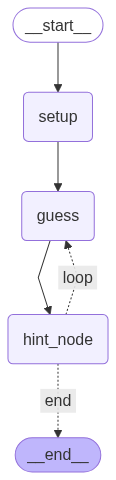

In [116]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [119]:
app.invoke({"name": "Alice", "guesses":[], "counter" : 0, "target": 0, "lower_bound": 1, "upper_bound": 20, "hint": ""})

Attempt 1: 13
hint : 9 is high
continuing with the game 1/7 attempts used 
Attempt 2: 18
hint : 9 is high
continuing with the game 2/7 attempts used 
Attempt 3: 17
hint : 9 is high
continuing with the game 3/7 attempts used 
Attempt 4: 19
hint : 9 is high
continuing with the game 4/7 attempts used 
Attempt 5: 20
hint : 9 is high
continuing with the game 5/7 attempts used 
Attempt 6: 20
hint : 9 is high
continuing with the game 6/7 attempts used 
Attempt 7: 19
hint : 9 is high
You have zero chances left, Correct answer was 9


{'name': 'Hi Alice WELCOME to the Game ',
 'target': 9,
 'guesses': [13, 18, 17, 19, 20, 20, 19],
 'counter': 7,
 'lower_bound': 19,
 'upper_bound': 20,
 'hint': '9 is high'}